<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:** Michelle J. Kim, Ian Reinert

#### Business Problem
Statistics about data scientist salaries are widely propogated without much context. We examine what influences Data Scientist salaries and it's oveerall changes over time as supply begins to meet demand. We examine salaries across industries, titles, and location to help aspiring Data Scientists evaluate compensation offers.

#### Analysis
<b>Data</b>: Employers hiring international workers must submit an application for H1B visas with the US Deptartment of Labor. Data from these applications are available at H1Bdata.info including salary, location, and company information from 2012 to March of 2019. 

More info on web scraping: SalaryDataScraper.ipynb

<b>Caveats:</b>
This data is self-reported. Salaries are both estimates of what the employer plans to compensate prospective employees as well as what is actually paid, the latter likelier in the case of a visa renewal. 

We <u>assume</u> that the effect of geography, industry, and title are similar within visa applicants are similar to impacts on salaries for US citizens, even though salaries may differ between the two group. Unfortunately, the latter difference cannot be tested with this analysis.

In [3]:
%load_ext autoreload
%autoreload 2

In [78]:
import pandas as pd
import data_cleaning as dc
import matplotlib.pyplot as plt
import seaborn as sns
import visualizations as viz

# dirty_data = pd.read_csv('./data/dirty_data.csv')
clean = dc.full_clean()
clean.head()

,company,location,role,salary,startdate,status,submitdate,year,region,industry
0,THE MATLEN SILVER GROUP INC,"CHARLOTTE, NC",DATA SCIENTIST,170000,01/05/2015,CERTIFIED,12/12/2014,2014,OTHER,OTHER
1,THOUGHTWORKS INC,"CHICAGO, IL",DATA SCIENTIST,71718,09/29/2014,CERTIFIED,09/29/2014,2014,OTHER,OTHER
2,EVANTAGE SOLUTIONS INC,"BELLEVUE, WA",DATA SCIENTIST,73923,12/15/2014,CERTIFIED,12/15/2014,2014,OTHER,OTHER
3,HOTWIRE INC,"BELLEVUE, WA",DATA SCIENTIST,74755,10/20/2014,CERTIFIED,10/08/2014,2014,OTHER,TECH
4,FINO CONSULTING LLC,"NEW YORK, NY",DATA SCIENTIST,82000,10/20/2014,CERTIFIED,10/16/2014,2014,NYC,CONSULTING


AttributeError: 'list' object has no attribute 'title'

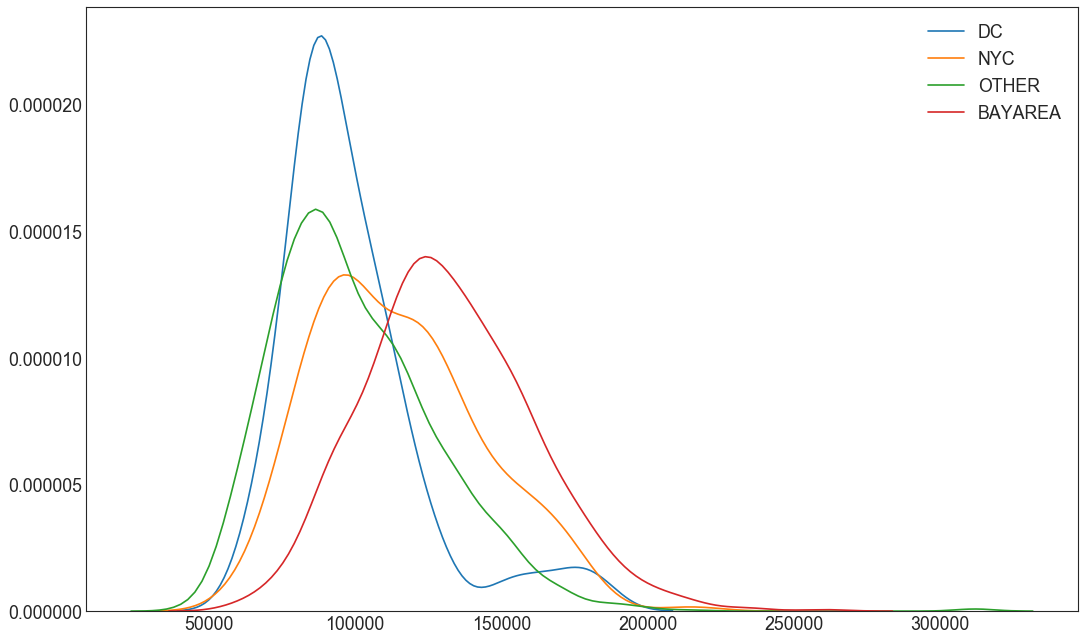

In [97]:
# input_vars = set(list(clean['Role']))
fig = viz.visualization_two(clean[clean['year']==2018])
fig

AttributeError: Unknown property kind

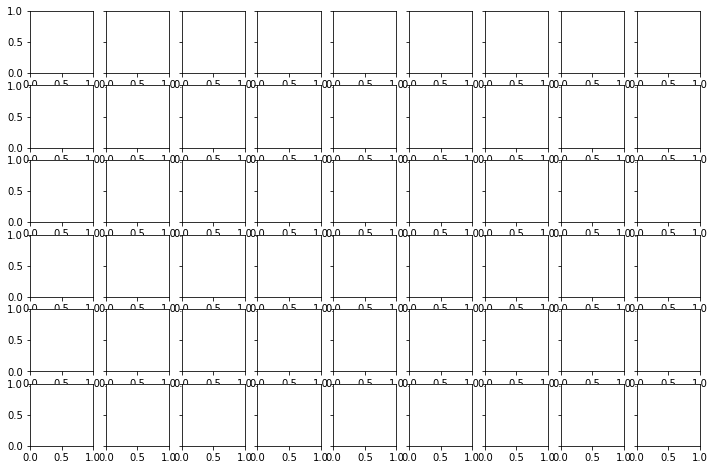

In [19]:
# Visual Checks on Normality of Dependent Variable (Salary) among Groups

# Year/Role
nrows = len(clean['Year'].unique())
ncols = len(clean['Role'].unique())

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,8), sharey='row')

for nr, year in enumerate(clean['Year'].unique()):
    for nc, role in enumerate(clean['Role'].unique()):
        plt.plot(clean[(clean['Year']==year) & (clean['Role']==role)].Salary)
#         axes[nr][nc].hist(clean[(clean['Year']==year) & (clean['Role']==role)].Salary, density=True)
#         sns.kdeplot(clean[(clean['Year']==year) & (clean['Role']==role)].Salary, ax=axes[nr][nc])
        axes[nr][nc].set_xlim([0, 250000])
        axes[nr][nc].set_ylim([0, .00005])
#         axes[nr][nc].set_xticklabels(['0', '200K'])
        try:
            axes[nr][nc].get_legend().remove()
        except:
            pass
plt.show()

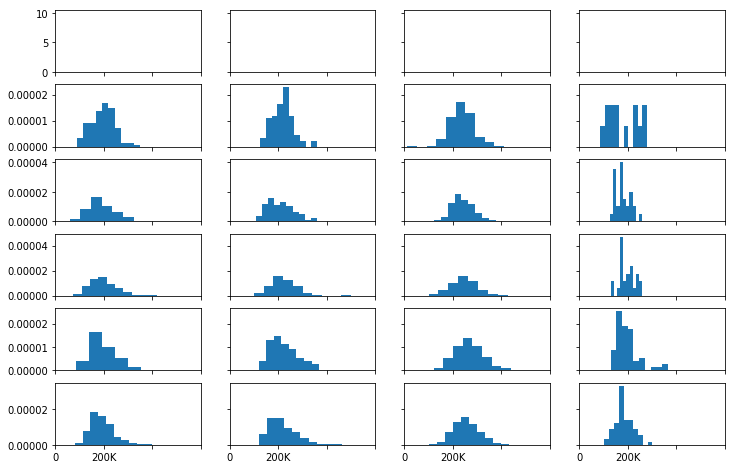

In [8]:
# Year/Region

nrows = len(clean['Year'].unique())
ncols = len(clean['Region'].unique())

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,8), sharex='all', sharey='row')
for nr, year in enumerate(clean['Year'].unique()):
    for nc, reg in enumerate(clean['Region'].unique()):
        axes[nr][nc].hist(clean[(clean['Year']==year) & (clean['Region']==reg)].Salary, density=True)
        sns.kdeplot(clean[(clean['Year']==year) & (clean['Region']==role)].Salary, ax=axes[nr][nc])
        axes[nr][nc].set_xlim([0, 300000])
        axes[nr][nc].set_xticklabels(['0', '200K'])
        try:
            axes[nr][nc].get_legend().remove()
        except:
            pass
        
plt.show()

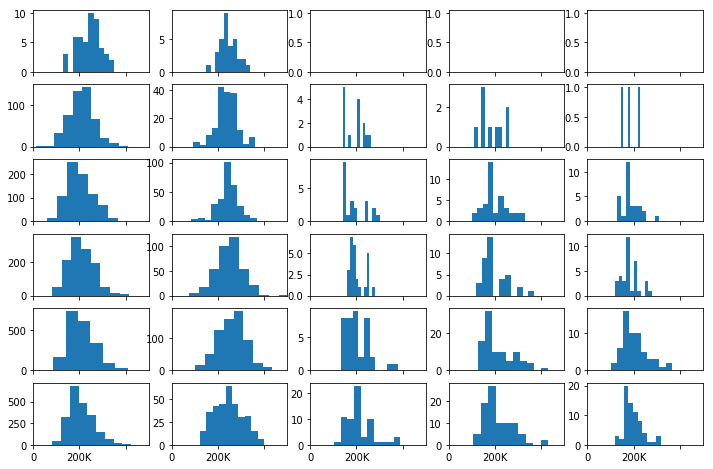

In [90]:
# Year/Industry

nrows = len(clean['Year'].unique())
ncols = len(clean['Industry'].unique())

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,8), sharex='all')
for nr, year in enumerate(clean['Year'].unique()):
    for nc, industry in enumerate(clean['Industry'].unique()):
        axes[nr][nc].hist(clean[(clean['Year']==year) & (clean['Industry']==industry)].Salary)
        axes[nr][nc].set_xlim([0, 250000])
        axes[nr][nc].set_xticklabels(['0', '200K'])
plt.show()

#### Findings & Application

#### Limitations

#### Next Steps